# Chanukya Sai Mendu
### Data Science and Businesss Analytics intern

## GRIP @The Sparks Foundation
### Task 2 :Prediction using Unsupervised Machine Learning

#### Task Description-From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

## Import the Libraries¶

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing the Data (Iris Dataset)

In [7]:
iris=pd.read_csv('Iris.csv')
iris=iris.set_index('Id')
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


#### Renaming the items in Species column

In [8]:
iris['Species']=iris['Species'].str[5:]

iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica


##### Checking for NULL values

In [9]:
iris.isna().any()

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

##### Understanding the data through describe() function

In [10]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Visualizing the data before clustering

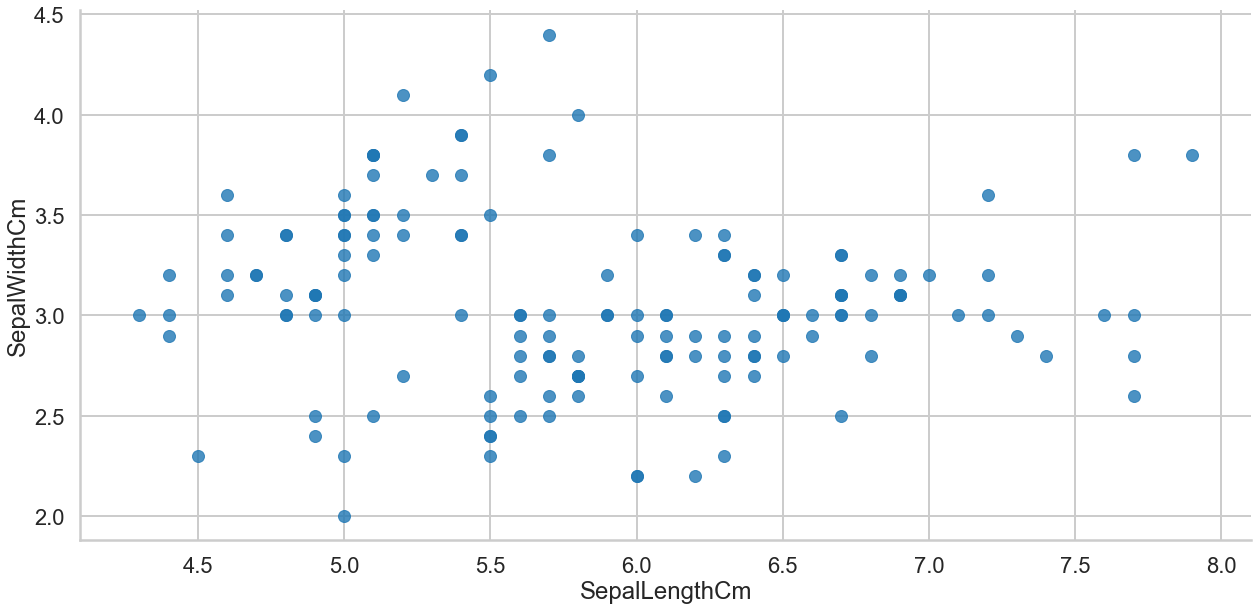

In [11]:
sns.set_style('whitegrid')
sns.set_context("poster")
sns.lmplot('SepalLengthCm','SepalWidthCm',data=iris,
           height=9,aspect=2,fit_reg=False)
plt.show()

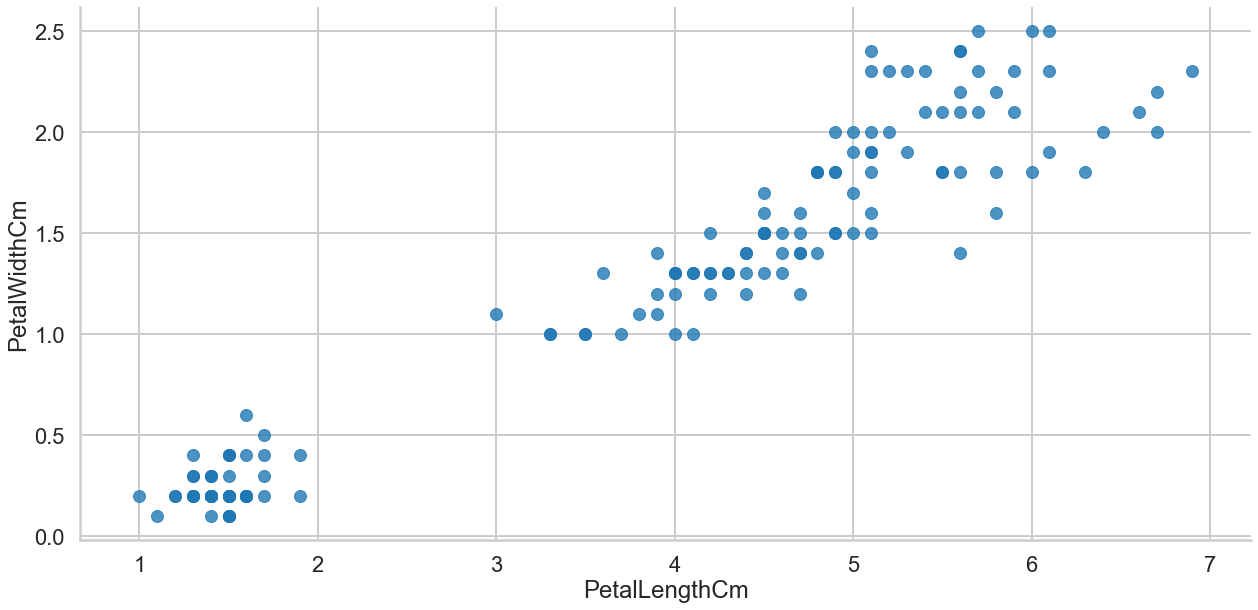

In [12]:
sns.set_style('whitegrid')
sns.set_context("poster")
sns.lmplot('PetalLengthCm','PetalWidthCm',data=iris, palette='Set1',
           height=9,aspect=2,fit_reg=False)
plt.show()

### Label Encoding the Species

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
iris['Label_of_Species']=le.fit_transform(iris['Species'])
iris['Label_of_Species'].value_counts()

2    50
1    50
0    50
Name: Label_of_Species, dtype: int64

In [14]:
species_labels={}
for i,j in zip(iris['Species'],iris['Label_of_Species']):
    if i in species_labels:
        pass
    else:
        species_labels[i]=j
species_labels

{'setosa': 0, 'versicolor': 1, 'virginica': 2}

#### Setosa -0
#### Versicolor -1
#### Virginica -2

#### Importing K-Means for clustering

In [15]:
from sklearn.cluster import KMeans

In [16]:
x = iris.iloc[:, [0, 1, 2, 3]].values


## Finding the optimum number of clusters  
###  The elbow method

In [17]:
wcss = []   #   WITHIN- CLUSTER-SUM-OF-SQUARES

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
wcss

[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.345409315718165,
 46.53558205128205,
 38.93873974358974,
 34.19068792479662,
 29.905374299825105,
 27.927882157034972,
 25.95549708624709]

##### WCSS is the sum of squared distance between each point and the centroid in a cluster. 
##### When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease. 
##### WCSS value is largest when K = 1. When we analyze the graph we can see that the graph will rapidly change at a point and thus creating an elbow shape. 

### Plotting the results onto a line graph, 
### `allowing us to observe 'The elbow'

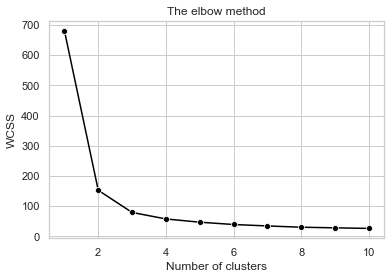

In [18]:
sns.set_context('notebook')
sns.lineplot(range(1, 11), wcss,marker='o',color='black')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

##### From this point, the graph starts to move almost parallel to the X-axis. The K value corresponding to this point is the optimal K value or an optimal number of clusters.
##### Optimal clusters=3 as the elbow appears at 3 (between a horizontal slope of points-4,5,6,7... and vertical slope of points -1,2)

## Initializing using kmeans++ with 3 clusters

In [25]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

## Visualizing Clusters

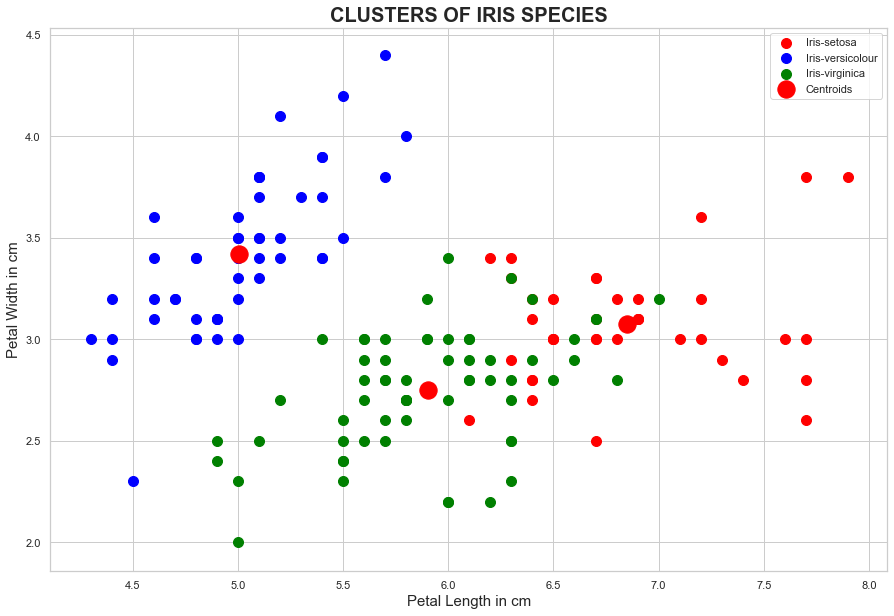

In [26]:
fig = plt.figure(figsize=(15, 10))
plt.title('CLUSTERS OF IRIS SPECIES',fontweight ='bold', fontsize=20)

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')     # SINCE SETOSA IS LABELLED AS 0
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')# SINCE VERSICOLOR IS LABELLED AS 1
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-') # SINCE VIRGINICA IS LABELLED AS 2
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 300, c = 'red',marker='o', 
            label = 'Centroids')
plt.ylabel('Sepal Width in cm',fontsize=15)
plt.xlabel('Sepal Length in cm',fontsize=15)
plt.legend()